In [115]:
import os
import cv2
import random
import nibabel as nib
import numpy as np
from PIL import Image
import torch
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import monai.transforms as transforms
# from torchvision.transforms import RandomAffine, RandomVerticalFlip, RandomHorizontalFlip, RandomRotation

In [116]:
dataDir = 'data_VAE_3D'
root_dir = '/home/mkh/MKH/KSA/VAE_3D/'+dataDir+'/'
train_msks = root_dir + 'train/'
val_msks = root_dir + 'val/'

In [117]:
print(len(os.listdir(train_msks)))
print(len(os.listdir(val_msks)))

452
66


In [118]:
aug_dir = root_dir + 'aug_train/'

if not os.path.exists(aug_dir):
    os.makedirs(aug_dir)

In [119]:
hf_transform = transforms.Compose([
        transforms.RandFlip(prob=1, spatial_axis=0)
    ])

In [120]:
def cc_transform(image):
    height, width = image.shape[:2]
    crop_height = int(height * 0.8)
    crop_width = int(width * 0.8)
    # print(crop_width, crop_height)
    y_start = (height - crop_height) // 2
    x_start = (width - crop_width) // 2
    y_end = y_start + crop_height
    x_end = x_start + crop_width
    cropped_image = image[y_start:y_end, x_start:x_end,:]
    return cropped_image

In [121]:
train_msks_paths = sorted(os.listdir(train_msks))
for mask in train_msks_paths:
    mask_dir = os.path.join(train_msks, mask)
    msk_name = mask.split('/')[-1:][0]
    current_msk = nib.load(mask_dir)
    current_msk_array = torch.from_numpy(current_msk.get_fdata())
    
    # Horizontal Flip
    # hf_aug_msk = hf_transform(current_msk_array)
    # hf_aug_msk = hf_aug_msk.numpy()
    # hf_aug_msk_name = 'HF' + msk_name
    # hf_save_msk_dir = aug_dir + hf_aug_msk_name
    # nib.save(nib.Nifti1Image(hf_aug_msk, current_msk.affine), hf_save_msk_dir)
    # Center Crop
    # cc_transform = transforms.CenterSpatialCrop(roi_size=(90,70))
    cc_aug_msk = cc_transform(current_msk.get_fdata()) 
    cc_aug_msk_name = 'CC' + msk_name
    cc_save_msk_dir = root_dir + 'aug_train/' + cc_aug_msk_name
    nib.save(nib.Nifti1Image(cc_aug_msk, current_msk.affine), cc_save_msk_dir)
    

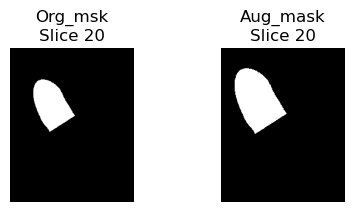

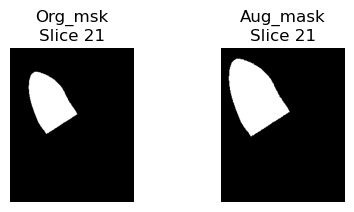

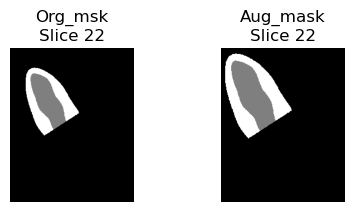

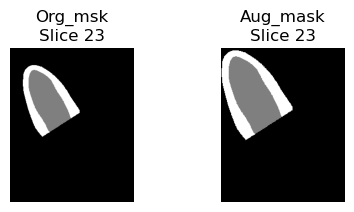

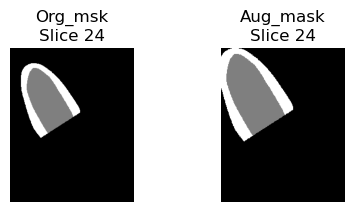

In [125]:
import matplotlib.pyplot as plt
import nibabel as nib

Org_mask_name = 'Patient001_3D_H_FETAL_time001.nii.gz'
Aug_mask_name = 'CCPatient001_3D_H_FETAL_time001.nii.gz'

Org_mask = nib.load(train_msks + Org_mask_name).get_fdata()
Aug_mask = nib.load(aug_dir + Aug_mask_name).get_fdata()

slice_no = 20

for i in range(1, 6):
    fig = plt.figure(figsize=(5, 2))

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.set_title("Org_msk\nSlice " + str(slice_no))
    ax1.imshow(Org_mask[:, :, slice_no], cmap="gray")
    ax1.axis('off')

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.set_title("Aug_mask\nSlice " + str(slice_no))
    ax2.imshow(Aug_mask[:, :, slice_no], cmap="gray")
    ax2.axis('off')

    slice_no += 1

    plt.show()
